# 数理统计

## 前言：
为什么要学会数理统计？ 因为我们现在所接触的所有跟人工智能相关的算法，特别是机器学习，我们都能在这些领域的算法中看到数理统计的影子。 甚至说许多机器学习中我们经常听到的一些传统算法，比如SVM之类的，其实都是来源于数理统计。 包括许多机器学习中的方法论，其实都是源于数理统计的方法论。 比如，机器学习中的学习（Learning）等同于数理统计中的预估（Estimation）， 机器学习中的监督学习（Supervised Learning）等同于数理统计中的分类（Classification），以及机器学习中的非监督式学习相当于数理统计中的聚类（Clustering）。 

虽然机器学习的本质是数理统计，但在许多方面这两个领域还是有分歧的， 在数理统计中，我们强调对数据进行归纳总结，对算法的可解释性。 然而在机器学习中，我们更多强调的是基于数据进行预测，我们更看重算法模型预测的准确率。 在机器模型的框架下，我们甚至可以适当的牺牲一点模型的可解释性来成全更高的预测准确率。

但是，即便数理统计和机器学习存在一定的差异，学好数理统计还是极其重要的，了解数理统计可以帮助我们更好的去理解机器学习算法的底层逻辑，从而最大程度的降低机器学习算法在可解释性上的牺牲。 同时，学好数理统计能帮助我们真正意义上去修改现有模型，甚至创建新的算法模型来满足我们工程上的需求。调包不可怕，可怕的是对所调的包一无所知。

接下来的内容，我将重点介绍一些数理统计中非常重要的概念

> 关键词：均值/方差/标准差

在数理统计中，给定一组数据，我们首先可以做的最基础的分析就是对这组数据的基本分布情况进行解释。其中最基础的分析工具就是均值，方差以及标准差。 通过这三个基本工具，我们就可以对给定数据的分布规律有一定基本的了解， 从而我们就可以做一些最基础的数据归纳与预测了。

### 均值（Mean）

均值这个我们从初中就学过的数学概念其实我们再熟悉不过了。假设给定以下随机生成的数据：

In [129]:
import numpy as np

X = np.random.randn(20,1)

X

array([[-1.40267267],
       [-1.44409727],
       [-0.83086769],
       [-0.6599751 ],
       [ 0.36537464],
       [ 0.98675805],
       [-0.99557926],
       [ 0.33637169],
       [-0.01299837],
       [-0.6227056 ],
       [ 0.30227987],
       [-0.89531551],
       [ 0.93783456],
       [-0.12983803],
       [-0.44154741],
       [ 0.3410791 ],
       [ 1.73618849],
       [-0.22703515],
       [ 1.46695352],
       [ 0.29231997]])

基于初中数学，我们都知道，我们可以用以下公式求出这组数据的平均值：

另$x_i$为X中的第i个数据, $\bar X$为$X$中所有数据的均值,$N$为数据的数量，则有：

$$\bar X = \frac {\sum _{i=0}^{N} x_i}{N}$$

将这个公式用代码形式表达出来就是

In [130]:
def mean(X):
    sum = 0
    N = X.size
    for x in X:
        sum += x
    mean = sum/N
    return mean.item()

mean(X)

-0.04487360800864555

但正常我们不会专门写这样的一串代码来实现均值的求解。 我们可以直接调用Numpy中的mean方法来实现均值的计算

In [6]:
np.mean(X)

NameError: name 'X' is not defined

以上就是均值计算的公式以及代码实现。 这一块其实都是大家所熟悉的。 但是这里我们想要进一步的为读者阐述均值的深层意义以及其在数理统计中的重要性。再数理统计中，平均值是一组数据总体趋势的一种描述指标。也就是说，给定一组数据，平均值能告诉我们这组数据中的大部分数据的一个聚拢情况。

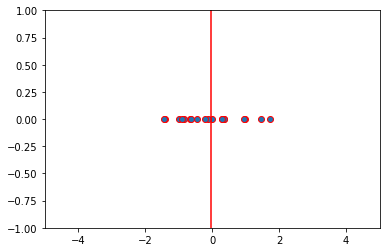

In [133]:
import matplotlib.pyplot as plt

y = []
for i in range(20):
    y.append(0)
plt.scatter(list(X),y,edgecolors='red')
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.vlines(-0.04487360800864555, -1,2,color="red") # Plot a vetical line indicating the postion of the mean
plt.show()

拿以上的X数据为例，我们可以观测到，这组数据中的数值都在向-0.04487360800864555(红线表示)靠拢。 有了这样一个均值，其实我们就可以做一些非常非常简陋的预测了。当有一枚新的数据被生成，我们可以简单的预估这个新生成的数据大概率会在-0.04487360800864555这个均值附近。 这只是一个非常粗略的预测，但是再数理统计中却有非常重要的意义。 基于这样一个均值，数理统计中衍生出了其他更多元的描述指标，通过这些衍生指标我们可以更加细致的描述一组数据，并且做出更加具有数学意义的预测。其中方差和标准差就是两个基于均值衍生的两个非常重要的描述指标



### 方差（Variance）

在均值的介绍中，我们说了，通过均值，我们可以知道一组数据中的大部分数据都会分布在均值的附近。 但是我们却没说这些数据离咱们的均值有多远。 为什么我们需要知道我们的数据离均值有多远呢？ 我们用两个例子来说明。

给定两组数据$X_1$和$X_2$

In [116]:
X_1  = np.array([1, 2, 4, 4.5 ,4.7 , 5, 5.1, 5.3, 5.7, 12.7])
X_2 = np.array([1, 1.1, 2.1, 2.2, 2.3, 7, 7.2, 7.3, 9.8, 10])

print ("X_1的均值为{}".format(X_1.mean()))
print ("X_2的均值为{}".format(X_2.mean()))

X_1的均值为5.0
X_2的均值为5.0


分别计算均值，我们可以得到$X_1$和$X_2$的均值皆为5.0

虽然两组数据的均值相等，但是如果我们将两组数据画如图中

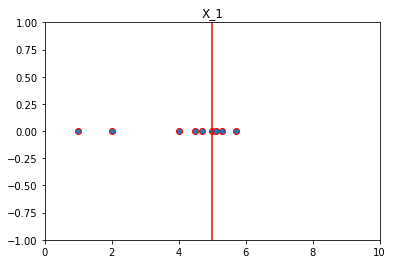

In [134]:
y = []
for i in range(10):
    y.append(0)
plt.scatter(list(X_1),y,edgecolors='red')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.vlines(5, -1,2,color="red") # Plot a vetical line indicating the postion of the mean
plt.title("X_1")
plt.show()

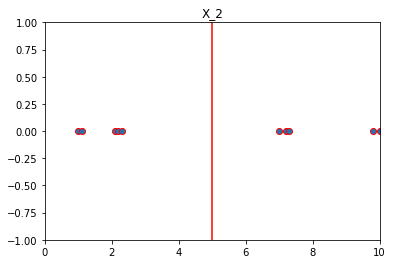

In [135]:
y = []
for i in range(10):
    y.append(0)
plt.scatter(list(X_2),y,edgecolors='red')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.vlines(5, -1,2,color="red") # Plot a vetical line indicating the postion of the mean
plt.title("X_2")
plt.show()

将两组数据画出来后，我们会发现一个很有趣的现象。 虽然两组数据均值皆为5，但是他们的数据分布情况完全不同。 对于X_1这一组数据我们可以观测到，大部分数据的值都离均值5很接近（往红线聚拢）。 但是同为均值5的X_2这组数据，我们会发现数据并没有呈现出一种像均值靠拢的趋势，这些数据的值离均值5有较大的差距。 

因此，光说一组数据的均值都分布在该均值附近的说法是不严谨的，因为我们并没有对附近这一个概念进行具体的程度量化。 因此，这里我们引入方差这一指标来进一步表述一组数据离其均值的偏差程度。 

具体公式为：
给定一组长度为N的数据X，另$Var(X)$为这组数据的方差，$x_i$为X中的第i个数据，则：

$$Var(X) = \frac {\sum_{i=0}^{N} (\bar{X}-x_i)^2}{N}$$

从这个公式，我们可以很直观的看出，方差就是对一组数据中所有数据与该数据均值的差值的平方和取平均值。 这里对差值取平方是为了忽略数据与均值偏离的正负，仅保留程度。 

将这个公式用代码实现，则有：

In [125]:
def var(X):
    mean = np.mean(X)
    N = X.size
    sum = 0
    for x in X:
        sum += (mean-x)**2
    variance = sum/N
    return variance

print ("X_1的方差为{}".format(var(X_1)))
print ("X_2的方差为{}".format(var(X_2)))

X_1的方差为8.622
X_2的方差为11.692


通过计算X_1和X_2的方差我们可以看出，X_2这组数据与其均值的偏移程度是大与X_1的

同样的，我们也可以调用Numpy中的函数来帮我们计算方差

In [126]:
print ("通过Numpy计算的X_1的方差为{}".format(np.var(X_1)))
print ("通过Numpy计算的X_2的方差为{}".format(np.var(X_2)))

通过Numpy计算的X_1的方差为8.622
通过Numpy计算的X_2的方差为11.692


所以，通过均值与方差我们可以知道给定一组数据，其数据会分布在均值附近，但会与均值存在一定的偏移，这个偏移程度就是这组数据的方差。显然，通过引入一个新的描述指标，我们对数据的分析进一步的细致化了。 

能不能再进一步精确细致呢？ 这里我们只描述了数据与均值的偏移**程度**。注意，因为我们对偏移取了平法，所以方差只描述了程度！而不是具体的偏移量， 方差的单位与数据的单位不是一致的。

因此，为了进一步将数据与平均值得偏移程度收敛至偏移量，我们引入新的一个叫标准差的指标。

### 标准差（Standard Deviation）
在求方差得过程中，为了忽略正负得影响，我们对数据与均值得偏移量，取了平方。 因此方差只能表述偏移程度。 为了进一步将偏移程度回归为与数据单位一致的偏移量，并得出标准差，我们只需对方差求平法跟即可。 即：

给定一组长度为N的数据X，另$\sigma(x)$为这组数据的标准差，$x_i$为X中的第i个数据，则：

$$\sigma(x) = \sqrt {Var(x)}$$

代码表述则为：

In [127]:
def std(x):
    variance = np.var(x)
    standard_deviation = np.sqrt(variance)
    return standard_deviation

print ("X_1的标准差为{}".format(std(X_1)))
print ("X_2的标准差为{}".format(std(X_2)))

X_1的标准差为2.9363242327781176
X_2的标准差为3.41935666463737


同样的，我们可以使用Numpy的平方差求解函数：

In [128]:
print ("通过Numpy计算的X_1的标准差为{}".format(np.std(X_1)))
print ("通过Numpy计算的X_2的标准差为{}".format(np.std(X_2)))

通过Numpy计算的X_1的标准差为2.9363242327781176
通过Numpy计算的X_2的标准差为3.41935666463737


因为标准差所描述的是数据与均值的偏移量，我们可以进一步将我们对数据的描述细化为：
- 对于数据X_1, 其数据的分布在均值5附近，与均值的平均偏移量为2.9363242327781176
- 对于数据X_2, 其数据的分布在均值5附近，与均值的平均偏移量为3.41935666463737


## 小结
均值，方差与标准差是数理统计与机器学习中非常重要的三个指标。 不论数理统计或者机器学习，其核心都是围绕着数据，通过这三个基本指标，我们在拿到一组数据时，能对该数据有一个较为清晰的基本面认知，从而进一步推动决定我们对模型算法的选择，修改甚至创建！ 虽然这三个指标很简单也很基础，但是小编强烈建议大家要将这三个指标牢记于心！